# Task 1: YouTube Streamer Analysis

### # Dataset : Top 1000 Youtubers statistics


## Description: 
## This dataset contains valuable information about the top YouTube streamers,including their ranking, categories, subscribers,country, visits, likes, comments, and more.
## Your task is to perform a comprehensive analysis of the dataset to extract insight about the top YouTube content creators.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import os
import warnings
warnings.filterwarnings("ignore")
from scipy import stats


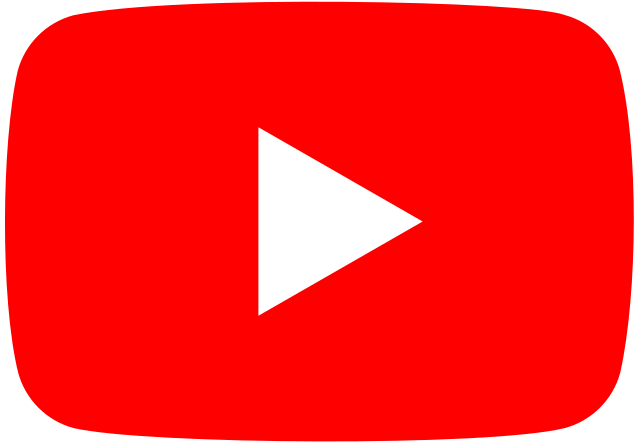

In [2]:
# displaying image
from IPython.display import Image
Image(filename="Youtube_logo.png")

In [3]:
# Loading Dataset
data=pd.read_csv("youtubers_df.csv") # getting csv file
data

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
...,...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...


# Basic checks

## 1.Start by exploring the dataset to understand its structure and identify key variables.

In [4]:
data.head(5) # displays initial 5 rows

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [5]:
data.tail(5) # displays final 5 rows

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
995,996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...
999,1000,OneindiaHindi,Noticias y Política,11700000.0,India,2200.0,31.0,1.0,http://youtube.com/channel/UCOjgc1p2hJ4GZi6pQQ...


In [6]:
data.shape # To get the number of rows and columns present in dataset

(1000, 9)

In [7]:
data.describe() # Statistical information about numerical data

,Rank,Suscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


In [8]:
data.describe(include="O") # Statistical information about categorical data

,Username,Categories,Country,Links
count,1000,694,1000,1000
unique,994,45,29,994
top,NickyJamTV,Música y baile,Estados Unidos,http://youtube.com/channel/UCpb_iJuhFe8V6rQdbN...
freq,2,160,293,2


In [9]:
data.columns # displays column names

Index(['Rank', 'Username', 'Categories', 'Suscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

In [10]:
data.duplicated().sum() # No duplicate values present in dataset

0

In [11]:
data.info() # Quick summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [12]:
data.isnull().sum() # Checking for null values

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [13]:
data.Categories=data.Categories.fillna(data["Categories"].mode()[0]) # filling null values

# TASKS:

### 2. Trend Analysis:
### - Identify trends among the top YouTube streamers. Which categories are the most popular?
### - Is there a correlation between the number of subscribers and the number of likes or comments?

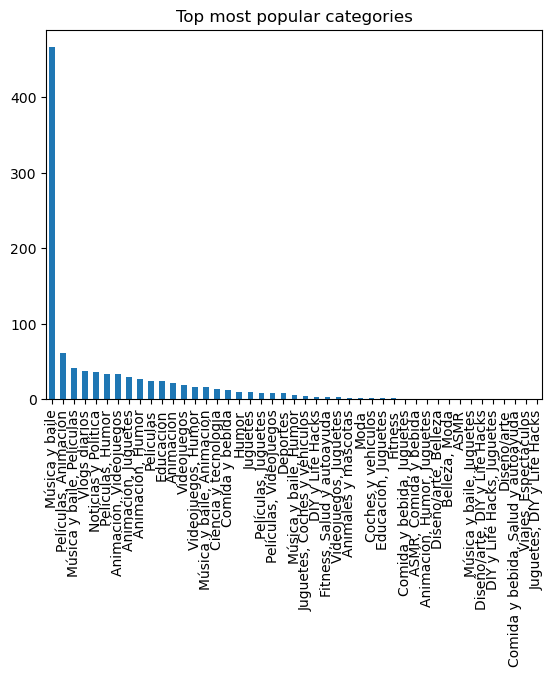

In [14]:
# Identify trends among the top YouTube streamers. Which categories are the most popular?
plot=data.Categories.value_counts()[:46] # getting top most categories
plot.plot(kind="bar") # plotting barplot
plt.title('Top most popular categories')
plt.show()

#### from the above plot we can see that Música y baile is most popular category

In [15]:
# checking correlation between the number of subscribers and the number of likes or comments
corr=data[["Suscribers","Comments","Likes"]].corr() # using corr function
corr

,Suscribers,Comments,Likes
Suscribers,1.000000,0.036350,0.211639
Comments,0.036350,1.000000,0.325911
Likes,0.211639,0.325911,1.000000


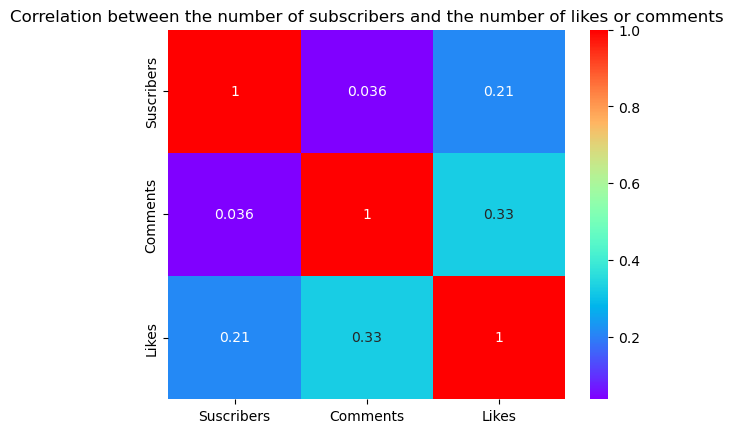

In [16]:
# Visualising correlation using heatmap
sns.heatmap(corr,annot=True,cmap="rainbow") 
plt.title("Correlation between the number of subscribers and the number of likes or comments")
plt.show()

### There is no high correlation between number of subscribers and the number of likes or comments

### 3. Audience Study:
### - Analyze the distribution of streamers audiences by country. Are there regional preferences forspecific content categories?

In [17]:
audience_dist=data["Country"].value_counts() # gatting top most countries
audience_dist

Estados Unidos    293
India             241
Unknown           171
Brasil             64
México             58
Indonesia          38
Rusia              25
Tailandia          18
Colombia           16
Filipinas          13
Pakistán           11
Argentina           7
Egipto              5
Francia             4
Turquía             4
Arabia Saudita      4
España              4
Iraq                4
Japón               3
Bangladesh          3
Reino Unido         3
Marruecos           2
Argelia             2
Perú                2
Singapur            1
Ecuador             1
Jordania            1
El Salvador         1
Somalia             1
Name: Country, dtype: int64

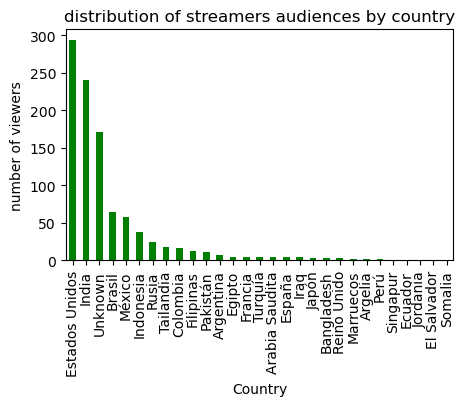

In [18]:
# distribution of top countries using bar chart
plt.figure(figsize=(5,3))
audience_dist.plot(kind="bar",color="green") # using barplot
plt.title("distribution of streamers audiences by country")
plt.xlabel("Country")
plt.ylabel("number of viewers")
plt.show()


#### the top most country is : Estados Unidos,with 293 value counts

### 4. Performance Metrics:
### - Calculate and visualize the average number of subscribers, visits, likes, and comments.
### - Are there patterns or anomalies in these metrics?

In [19]:
# calculating and visualizing average number of subscribers, visits, likes, and comments.
mean=data[["Suscribers","Comments","Likes","Visits"]].mean() # calculating average/mean
mean

Suscribers    2.189440e+07
Comments      1.288768e+03
Likes         5.363259e+04
Visits        1.209446e+06
dtype: float64

<Figure size 200x200 with 0 Axes>

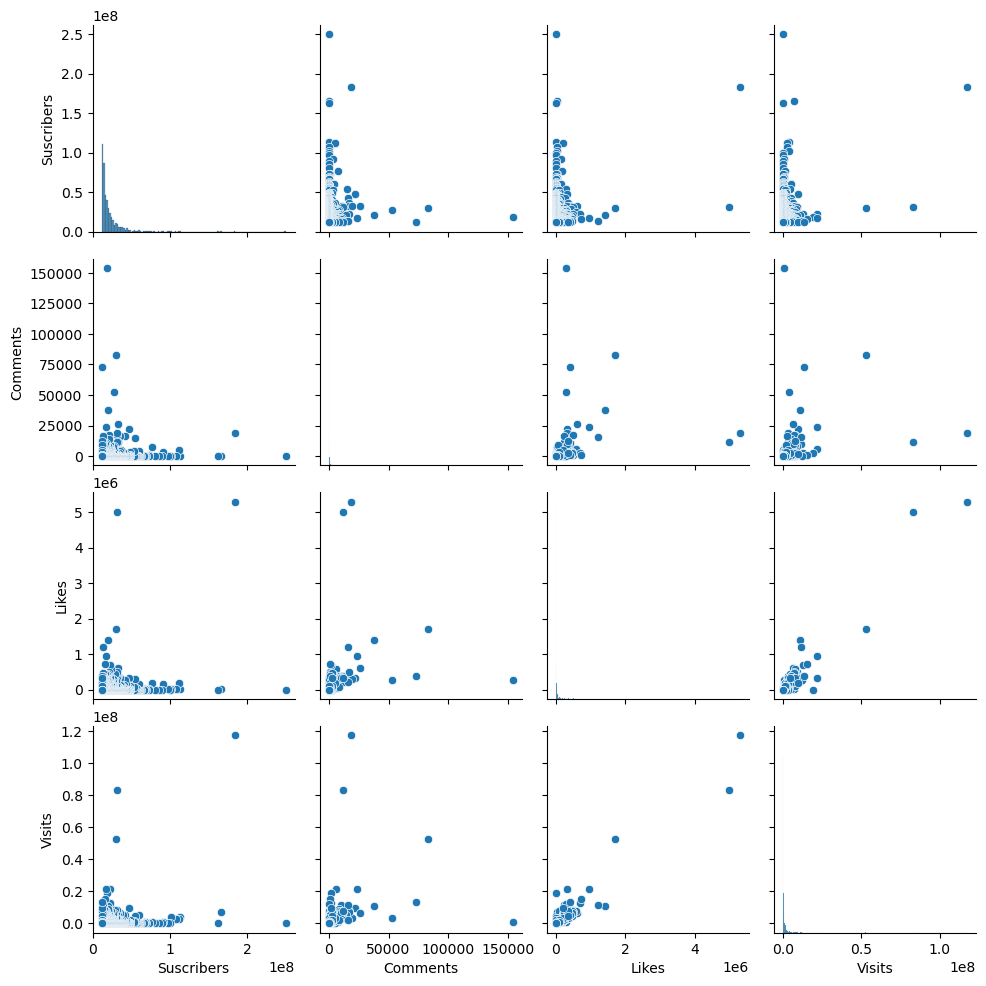

In [20]:
# visualizing average number of subscribers, visits, likes, and comments.
plt.figure(figsize=(2,2))
sns.pairplot(data[["Suscribers","Comments","Likes","Visits"]])
plt.show()

## 5. Content Categories:
### - Explore the distribution of content categories. Which categories have the highest number of streamers?
### - Are there specific categories with exceptional performance metrics?

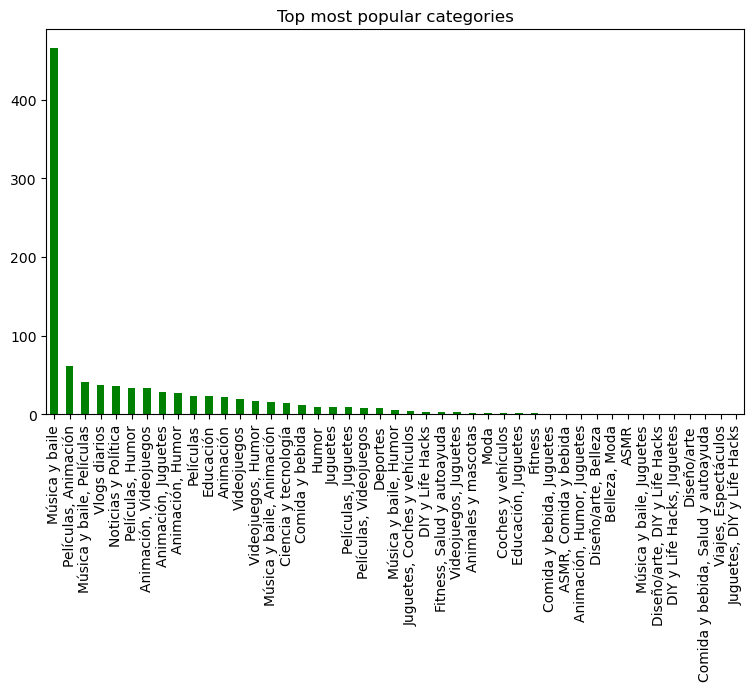

In [21]:
# distribution of content categories.
plt.figure(figsize=(9,5))
category_counts=data.Categories.value_counts()[:46]
plot.plot(kind="bar",color="green")
plt.title('Top most popular categories')
plt.show()

In [22]:
# categories with exceptional performance metrics
categories_metrics=data.groupby("Categories")[["Suscribers","Comments","Likes","Visits"]].mean()
categories_metrics

,Suscribers,Comments,Likes,Visits
Categories,,,,
ASMR,1.520000e+07,148.000000,4100.000000,3.685000e+05
"ASMR, Comida y bebida",1.300000e+07,349.000000,8600.000000,5.575000e+05
Animación,1.764091e+07,396.636364,21413.454545,6.367182e+05
"Animación, Humor",2.078519e+07,5344.962963,145768.333333,3.760126e+06
"Animación, Humor, Juguetes",1.390000e+07,0.000000,37.000000,8.000000e+03
"Animación, Juguetes",2.937586e+07,0.517241,2653.068966,5.254483e+05
"Animación, Videojuegos",1.939412e+07,3786.617647,79294.029412,1.200059e+06
Animales y mascotas,1.560000e+07,2806.000000,102750.000000,2.231450e+06
"Belleza, Moda",2.390000e+07,1100.000000,62300.000000,9.645000e+05


# 6. Brands and Collaborations:
###  - Analyze whether streamers with high performance metrics receive more brand collaborations and marketing campaigns

In [23]:
# Performance metrics
data['Performance'] = data['Likes'] + data['Comments']+data["Suscribers"] # creating new column
data["Performance"].head()

0    249502778.0
1    188818500.0
2    165524700.0
3    162600175.0
4    113512400.0
Name: Performance, dtype: float64

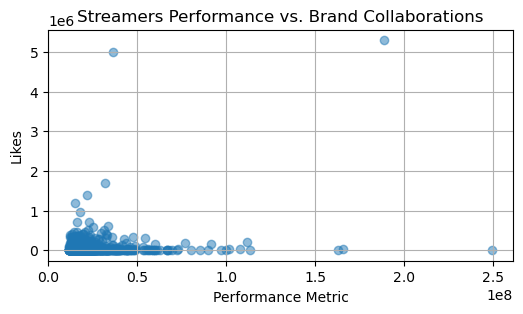

In [24]:
# Plot a scatter plot to visualize the relationship between performance and number of 'Likes' or 'Comments'
plt.figure(figsize=(6, 3))
plt.scatter(data['Performance'], data['Likes'], alpha=0.5)
plt.xlabel('Performance Metric')
plt.ylabel('Likes')
plt.title('Streamers Performance vs. Brand Collaborations')
plt.grid(True)
plt.show()

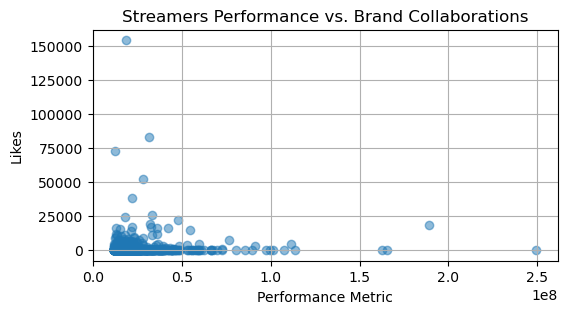

In [25]:
plt.figure(figsize=(6, 3))
plt.scatter(data['Performance'], data['Comments'], alpha=0.5)
plt.xlabel('Performance Metric')
plt.ylabel('Likes')
plt.title('Streamers Performance vs. Brand Collaborations')
plt.grid(True)
plt.show()

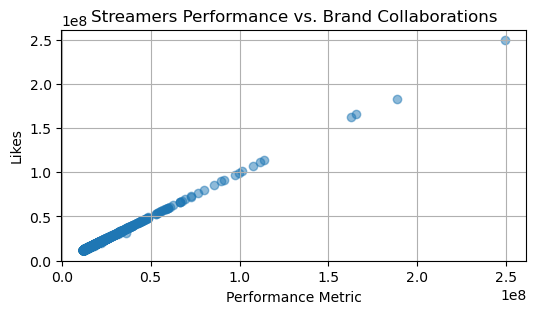

In [26]:
plt.figure(figsize=(6, 3))
plt.scatter(data['Performance'], data['Suscribers'], alpha=0.5)
plt.xlabel('Performance Metric')
plt.ylabel('Likes')
plt.title('Streamers Performance vs. Brand Collaborations')
plt.grid(True)
plt.show()

# 7. Benchmarking:
###  - Identify streamers with above-average performance in terms of subscribers, visits, likes, and comments.
### - Who are the top-performing content creators?

In [27]:
# Calculating average performance in terms of subscribers, visits, likes, and comments.
suscribers_avg=data.Suscribers.mean()
visits_avg=data.Visits.mean()
likes_avg=data.Likes.mean()
comments_avg=data.Comments.mean()

In [28]:
# Calculating above average performance in terms of subscribers, visits, likes, and comments.
above_avg=data[(data.Suscribers>suscribers_avg) & 
              (data.Visits>visits_avg) & 
              (data.Likes>likes_avg) & 
              (data.Comments>comments_avg)]
above_avg.head(10)

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links,Performance
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...,188818500.0
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...,111702200.0
26,27,dudeperfect,Videojuegos,59700000.0,Estados Unidos,5300000.0,156500.0,4200.0,http://youtube.com/channel/UCRijo3ddMTht_IHyNS...,59860700.0
34,35,TaylorSwift,Música y baile,54100000.0,Estados Unidos,4300000.0,300400.0,15000.0,http://youtube.com/channel/UCqECaJ8Gagnn7YCbPE...,54415400.0
39,40,JuegaGerman,"Películas, Animación",48600000.0,México,2000000.0,117100.0,3000.0,http://youtube.com/channel/UCYiGq8XF7YQD00x7wA...,48720100.0
43,44,A4a4a4a4,"Animación, Humor",47300000.0,Rusia,9700000.0,330400.0,22000.0,http://youtube.com/channel/UC2tsySbe9TNrI-xh2l...,47652400.0
58,59,Mikecrack,"Películas, Animación",43400000.0,México,2200000.0,183400.0,1800.0,http://youtube.com/channel/UCqJ5zFEED1hWs0KNQC...,43585200.0
62,63,KimberlyLoaiza,Música y baile,42100000.0,México,5300000.0,271300.0,16000.0,http://youtube.com/channel/UCQZfFRohQ7UX-0CdXl...,42387300.0
64,65,luisitocomunica,Música y baile,41100000.0,México,2500000.0,128900.0,1800.0,http://youtube.com/channel/UCECJDeK0MNapZbpaOz...,41230700.0
70,71,JessNoLimit,"Películas, Animación",39600000.0,Indonesia,1300000.0,73500.0,1600.0,http://youtube.com/channel/UCvh1at6xpV1ytYOAzx...,39675100.0


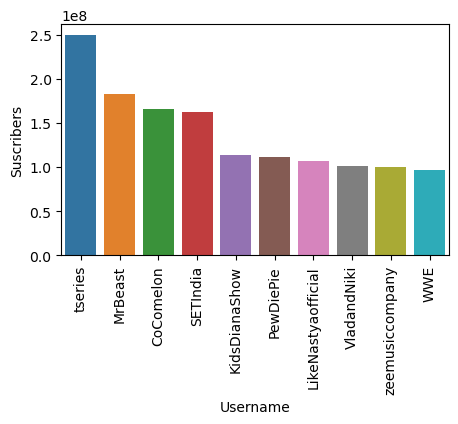

In [29]:
#  top-performing content creators w.r.t suscribers
plt.figure(figsize=(5,3))
sns.barplot(x=data.Username[:10],y=data.Suscribers)
plt.xticks(rotation=90)
plt.show()


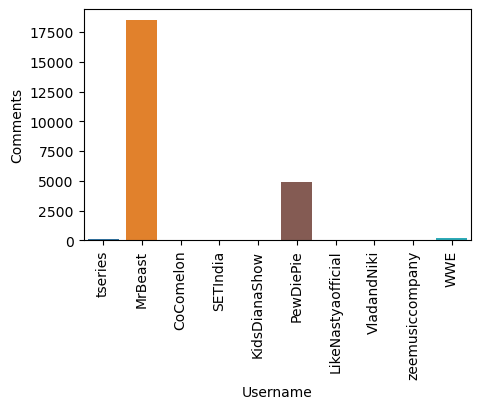

In [30]:
#  top-performing content creators w.r.t comments
plt.figure(figsize=(5,3))
sns.barplot(x=data.Username[:10],y=data.Comments)
plt.xticks(rotation=90)
plt.show()

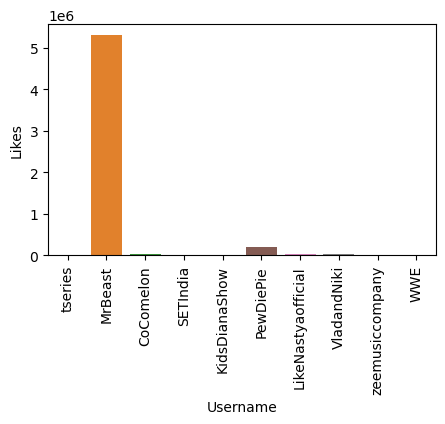

In [31]:
#  top-performing content creators w.r.t likes
plt.figure(figsize=(5,3))
sns.barplot(x=data.Username[:10],y=data.Likes)
plt.xticks(rotation=90)
plt.show()

# 8. Content Recommendations:
### - Propose a system for enhancing content recommendations to YouTube users based on streamers categories and performance metrics


In [32]:
#  content recommendations for a user
def get_content_recommendations(username, data):
    user_data = data[data['Username'] == username]
    if user_data.empty:
        return f"User '{username}' not found in the dataset."
    # Filter streamers from the same category and with higher performance
    recommendations = data[(data['Categories'] == user_data['Categories'].values[0]) & 
                              (data['Performance'] > user_data['Performance'].values[0])]
    if recommendations.empty:
        return f"No recommendations found for user '{username}'."
    
    # Sort by performance and take the top recommendations
    recommendations = recommendations.sort_values(by='Performance', ascending=False)
    
    return recommendations['Username'].tolist()

In [33]:
# Get content recommendations for a user
user_recommendations = get_content_recommendations('TechnoGamerzOfficial', data)
print("Recommended streamers for you:", user_recommendations)

Recommended streamers for you: ['tseries', 'SETIndia', 'zeemusiccompany', 'BLACKPINK', 'GoldminesTelefilms', 'BTS', 'HYBELABELS', 'zeetv', 'KondZilla', 'colorstv', 'filmigaane', 'TSeriesBhaktiSagar', 'tipsofficial', 'ElReinoInfantil', 'WaveMusicIndia', 'SonyMusicIndia', 'marshmello', 'yrf', 'LooLooKids', 'TaylorSwift', 'EdSheeran', 'ArianaGrande', 'shemaroo', 'BillieEilish', 'getmovies', 'sonymusicindiaVEVO', 'badabunOficial', 'vootkids', 'ARYDigitalasia', 'felipeneto', 'vcsabiavideos', 'abscbnentertainment', 'BRIGHTSIDEOFFICIAL', 'KatyPerry', 'MashaBearRUSSIAN', 'speedrecords', 'KimberlyLoaiza', 'IshtarMusic', 'luisitocomunica', 'SuperSimpleSongs', 'xxxtentacion', 'SonyPAL', 'WorkpointOfficial', 'gr6explode', 'GaaneSuneAnsune', 'TEDx', 'DaddyYankee', 'TheEllenShow', 'LikeNastya_ESP', 'one31official', 'ABPNEWS', 'YouTube', 'Jkk_Entertainment', 'UltraBollywood', 'beterbocuk', 'tseriesoldisgold', 'Ozuna']



#### Check for missing data and outliers

## Data preprocessing

### Encoding

In [34]:
# label Encoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [35]:
lb=LabelEncoder()
for column in data.columns:
    if data[column].dtype=="object":
        data[column]=lb.fit_transform(data[column])

In [36]:
(data.dtypes=="object").sum() # no categorical columns left

0

### handling Outliers

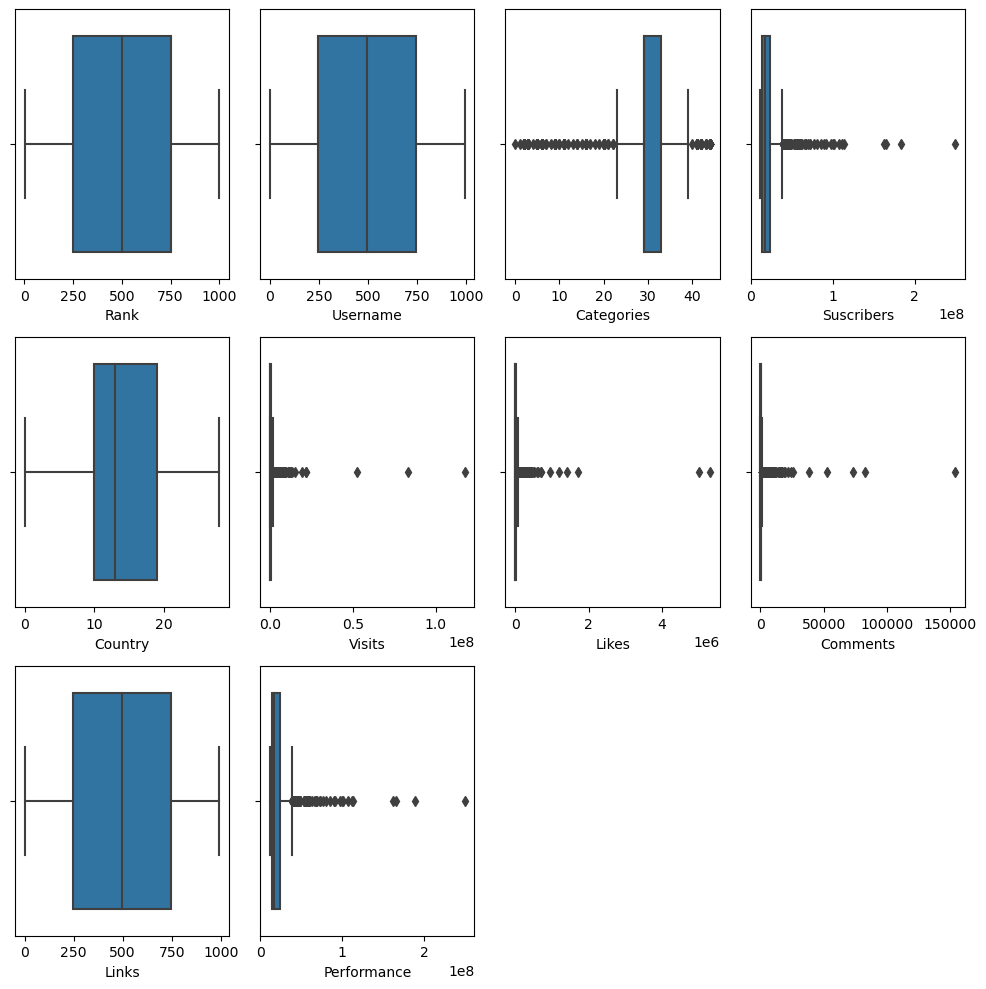

In [37]:
#Using boxplot to detect outliers
plt.figure(figsize=(10,10),facecolor='white')

plotnumber=1

for column in data:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(x=data[column])
        plotnumber+=1
plt.tight_layout() 

In [38]:
# Imputing outliers manually

data.loc[data.Suscribers>1.5,"Suscribers"]=np.median(data.Suscribers)
data.loc[data.Visits>0.2,"Visits"]=np.median(data.Visits)
data.loc[data.Likes>1,"Likes"]=np.median(data.Likes)
data.loc[data.Comments>25000,"Comments"]=np.median(data.Comments)
data.loc[data.Performance>1,"Performance"]=np.median(data.Performance)

In [39]:
data.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links,Performance
0,1,939,29,16750000.0,13,174450.0,3500.0,78.0,826,16799244.0
1,2,368,42,16750000.0,10,174450.0,3500.0,18500.0,506,16799244.0
2,3,107,20,16750000.0,28,174450.0,3500.0,0.0,588,16799244.0
3,4,467,29,16750000.0,13,174450.0,3500.0,9.0,807,16799244.0
4,5,275,5,16750000.0,28,174450.0,3500.0,0.0,731,16799244.0
